# Tarea 4. Agrupamiento

### Contexto
Este conjunto de datos contiene detalles médicos de los pacientes, incluidas características como el nivel de glucosa, la presión arterial, el nivel de insulina, el IMC, la edad y más. La variable objetivo indica si un paciente tiene diabetes. El objetivo de este conjunto de datos es crear y evaluar varios modelos de aprendizaje automático o aprendizaje profundo para predecir la aparición de la diabetes.

### Contenido

Este archivo contiene los registros médicos de los pacientes, que incluyen diversas métricas relacionadas con la salud. El objetivo es utilizar estas características para predecir si un paciente tiene diabetes. A continuación, se incluye una descripción detallada de cada columna del conjunto de datos:

**Embarazos:** Número de veces que la paciente ha estado embarazada.


**Glucosa:** Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral.


**Presión arterial:** Presión arterial diastólica (mm Hg).


**Grosor de la piel:** Grosor del pliegue cutáneo del tríceps (mm).


**Insulina:** Insulina sérica a las 2 horas (mu U/ml).


**IMC:** Índice de masa corporal (peso en kg/(altura en m)^2).


**DiabetesPedigreeFunction:** Función que puntúa la probabilidad de diabetes en función de los antecedentes familiares.


**Edad:** Edad de la paciente (años).


**Resultado:** Variable de clase (0 o 1), donde 1 representa la presencia de diabetes y 0 representa la ausencia de diabetes.

## Importar librerías y cargar la base de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('base de datos diabetes.csv', header = 0, delimiter = ',')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


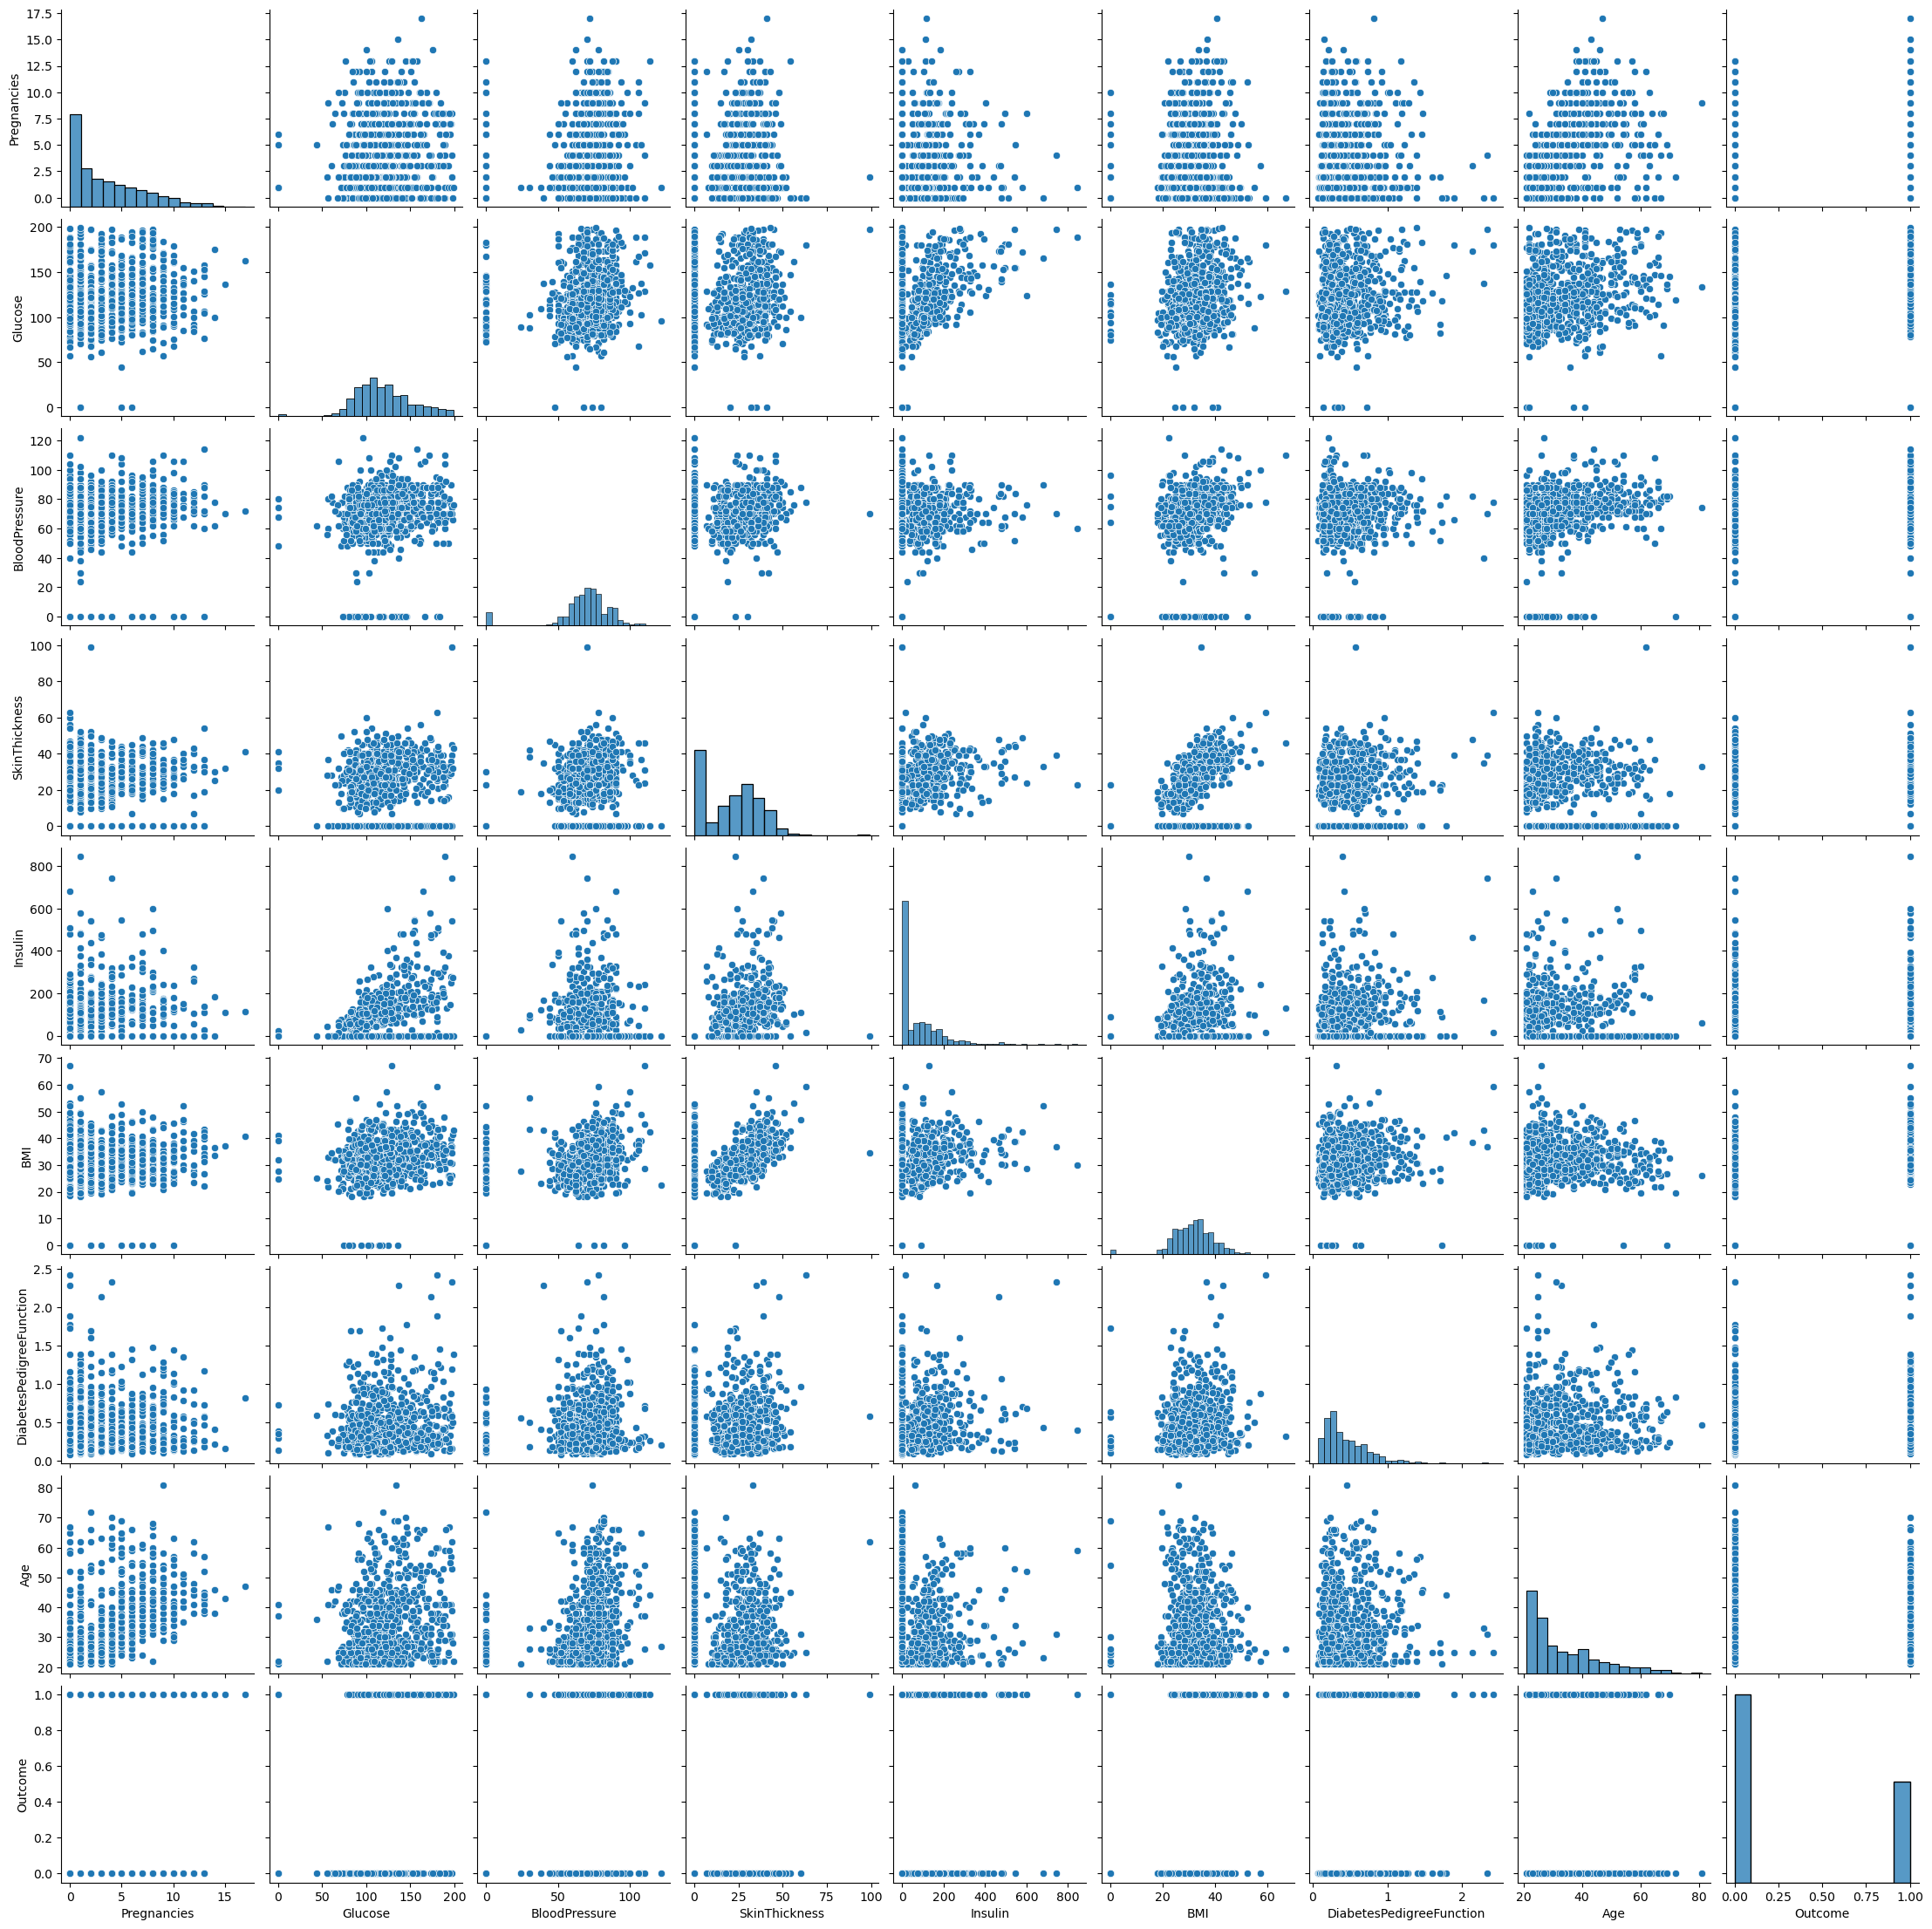

In [5]:
sns.pairplot(df)

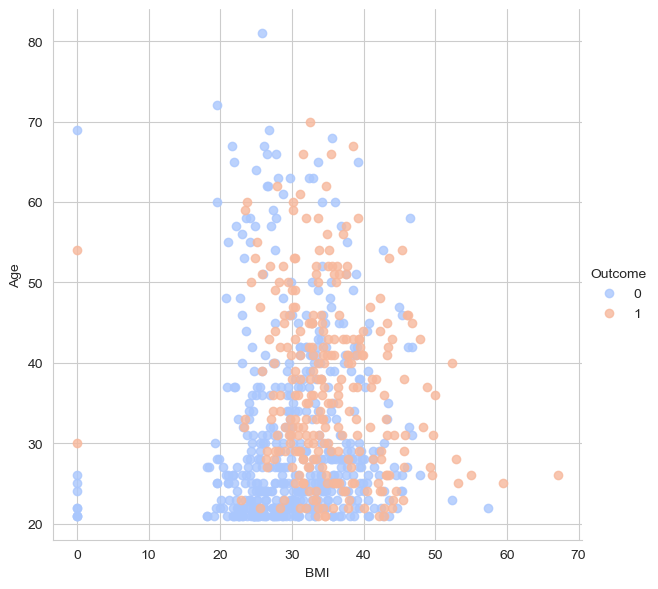

In [6]:
sns.set_style('whitegrid')
sns.lmplot(x='BMI',y='Age',data=df, hue='Outcome',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

## K-Means

Usaremos aprendizaje automático no supervisado, pero los datos están etiquetados.

Usaremos dos grupos, porque sabemos que solo hay dos tipos de diagnóstico: positivo o negativo.

In [7]:
kmeans = KMeans(n_clusters = 2)

In [8]:
kmeans.fit(df.drop("Outcome", axis = 1))

KMeans(n_clusters=2)

In [9]:
# Centroides

In [10]:
kmeans.cluster_centers_

array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
         32.21227197,  31.17363184,   0.43757048,  33.11442786],
       [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
        253.70909091,  34.98545455,   0.59724848,  33.7030303 ]])

In [11]:
print(confusion_matrix(df["Outcome"], kmeans.labels_))
print("\n")
print(classification_report(df["Outcome"], kmeans.labels_))

[[421  79]
 [182  86]]


              precision    recall  f1-score   support

           0       0.70      0.84      0.76       500
           1       0.52      0.32      0.40       268

    accuracy                           0.66       768
   macro avg       0.61      0.58      0.58       768
weighted avg       0.64      0.66      0.64       768



**Accuracy =** 0.66

## Probando el método con otro conjunto de datos.

Datos:

- **Usuario** - el nombre en Twitter.
- **op** = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte.
- **co** = Conscientiousness – grado de orden, prolijidad, organización.
- **ex** = Extraversion – grado de timidez, solitario o participación ante el grupo social.
- **ag** = Agreeableness – grado de empatía con los demás, temperamento.
- **ne** = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- **Wordcount** – Cantidad promedio de palabras usadas en sus tweets.
- **Categoria** – Actividad laboral del usuario (actor, cantante, etc.)

In [12]:
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.metrics import silhouette_score

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [13]:
df_twitter = pd.read_csv('analisis_twitter.csv', header = 0, delimiter = ',')

In [14]:
df_twitter.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [15]:
df_twitter.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Categoria:

- 1. Actor/actriz
- 2. Cantante
- 3. Modelo
- 4. Tv, series
- 5. Radio
- 6. Tecnología
- 7. Deportes
- 8. Politica
- 9. Escritor

In [16]:
# elementos por categoría
print(df_twitter.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


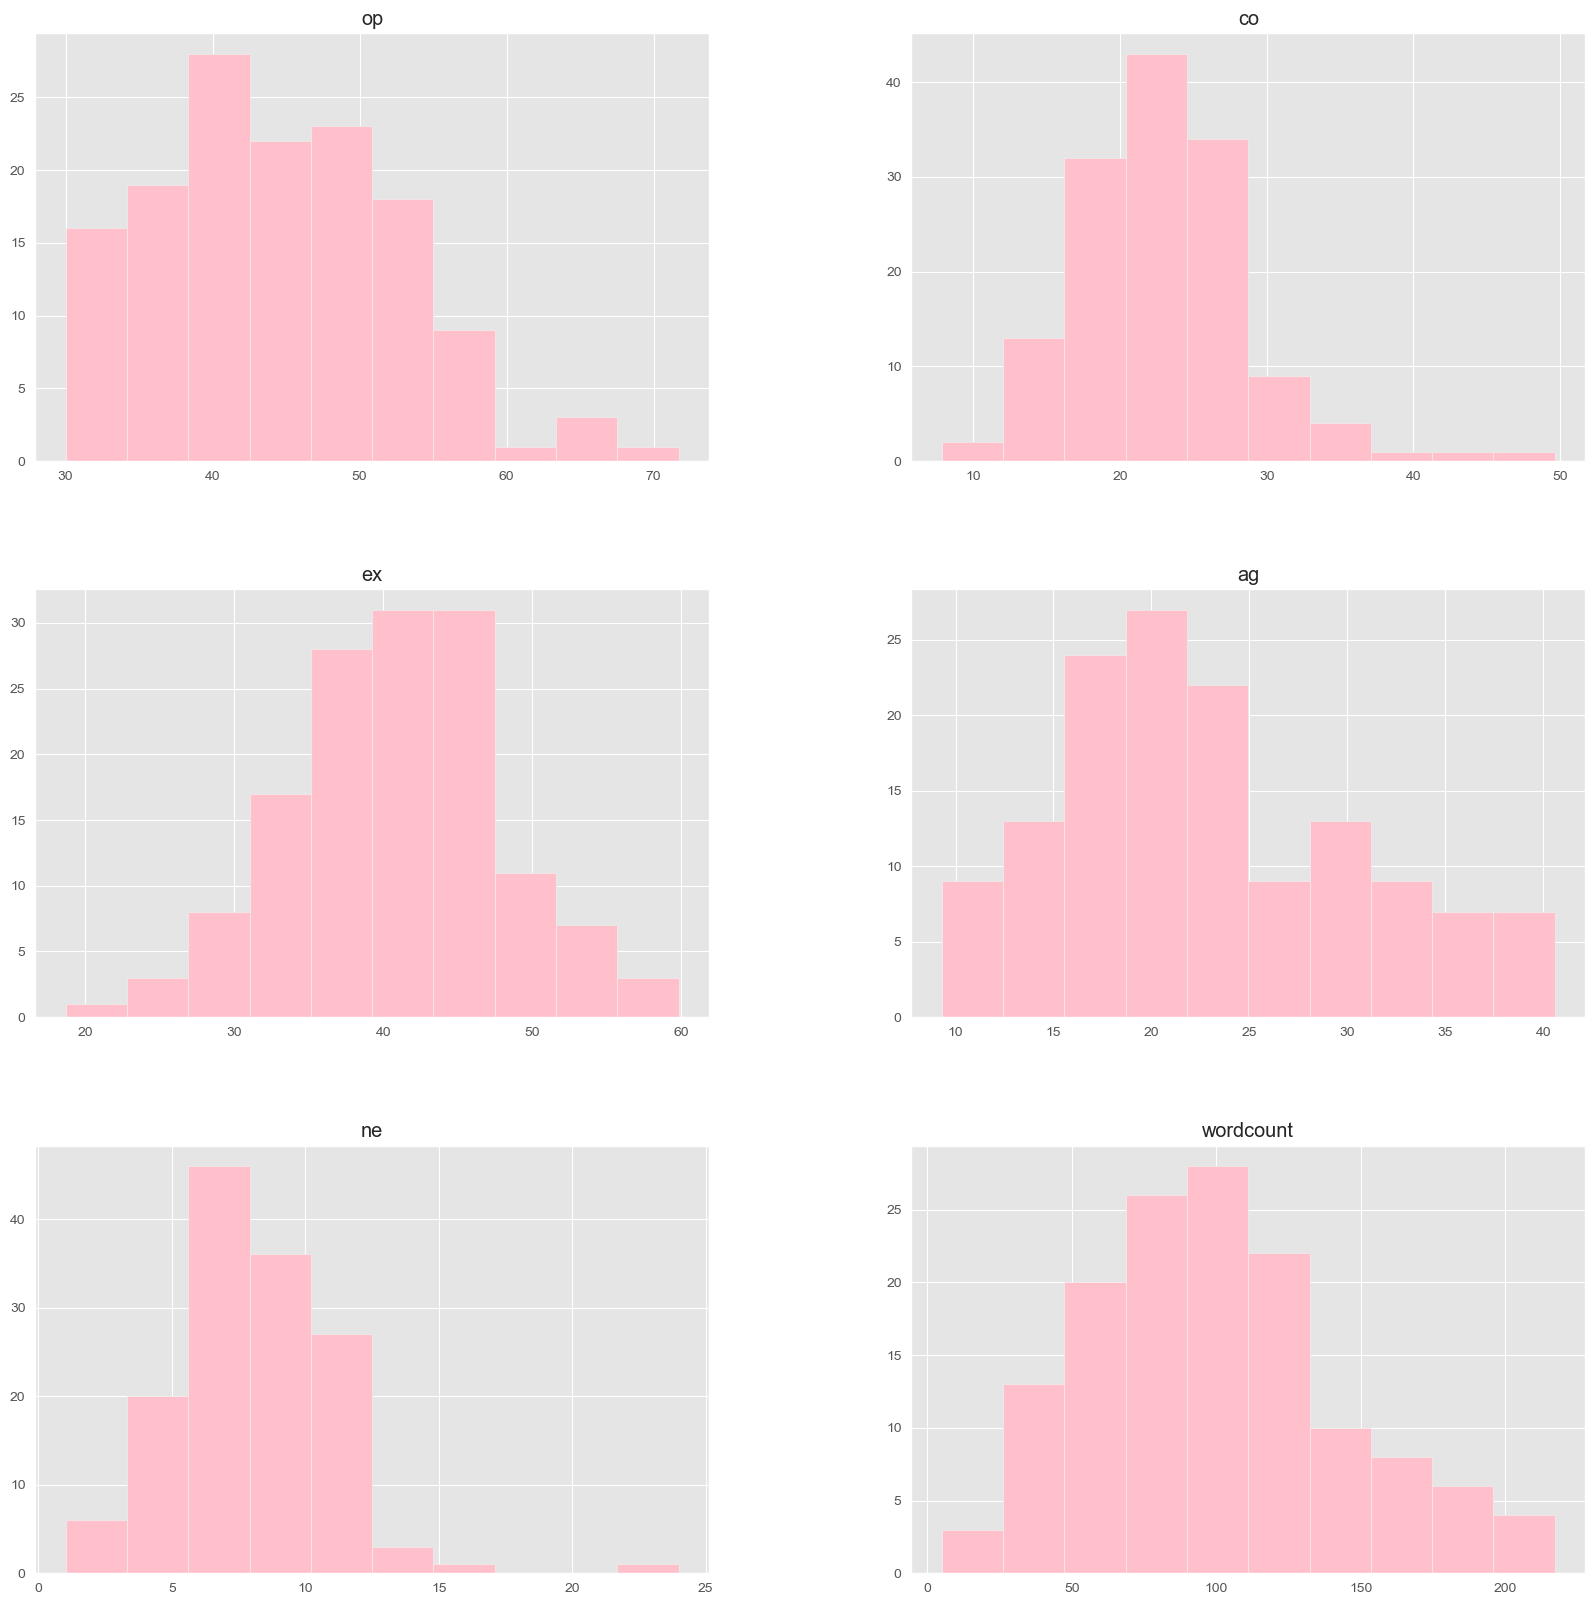

In [17]:
Var=['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
df_twitter[Var].hist(figsize=(20,20), color='pink')
plt.show()

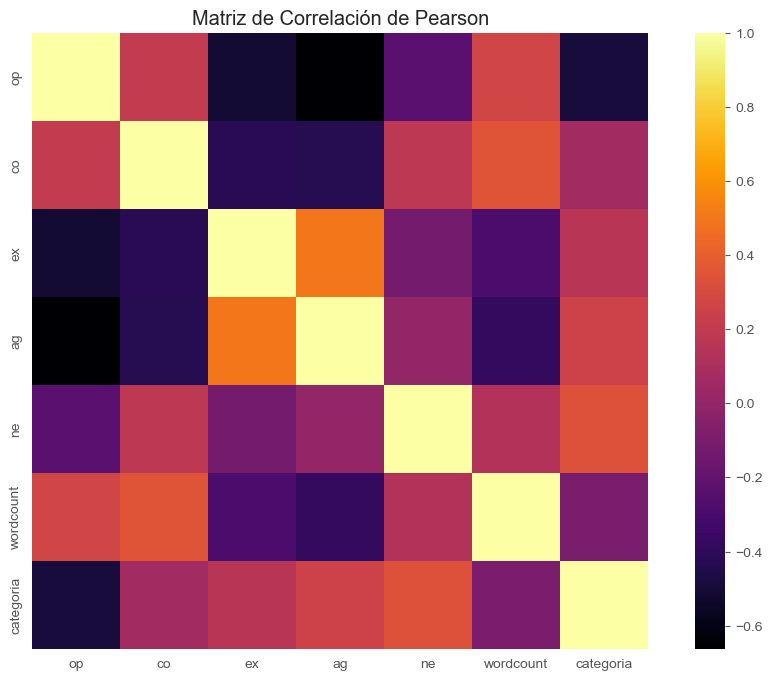

In [18]:
todas_las_varaiables = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria']

# Calcular la matriz de correlación de Pearson
corr_df_twitter = df_twitter[todas_las_varaiables].corr()

# Gráfico de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df_twitter, fmt=".2f", cmap='inferno', square=True)
plt.title('Matriz de Correlación de Pearson')
plt.show()

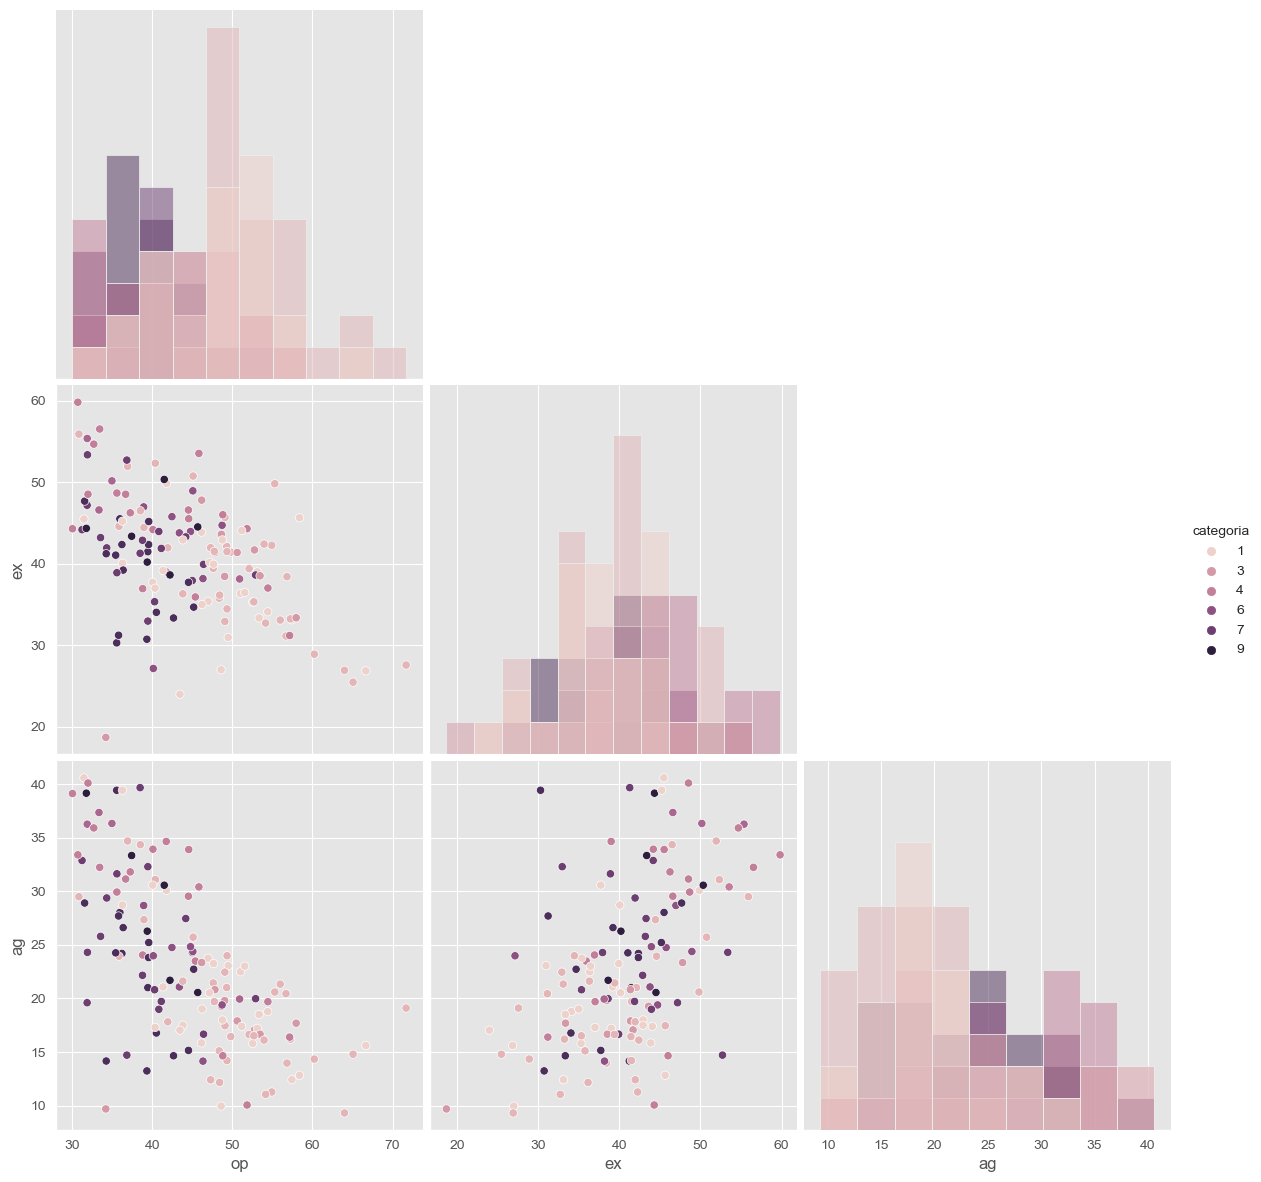

In [19]:
sns.pairplot(df_twitter.dropna(), hue='categoria',size=4, vars=["op","ex","ag"],
             kind='scatter', diag_kind="hist", corner=True)

In [20]:
X = np.array(df_twitter[["op","ex","ag"]])
y = np.array(df_twitter['categoria'])
X.shape

(140, 3)

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

<Figure size 1600x900 with 0 Axes>

### Identificar cantidad de clústeres adecuados.

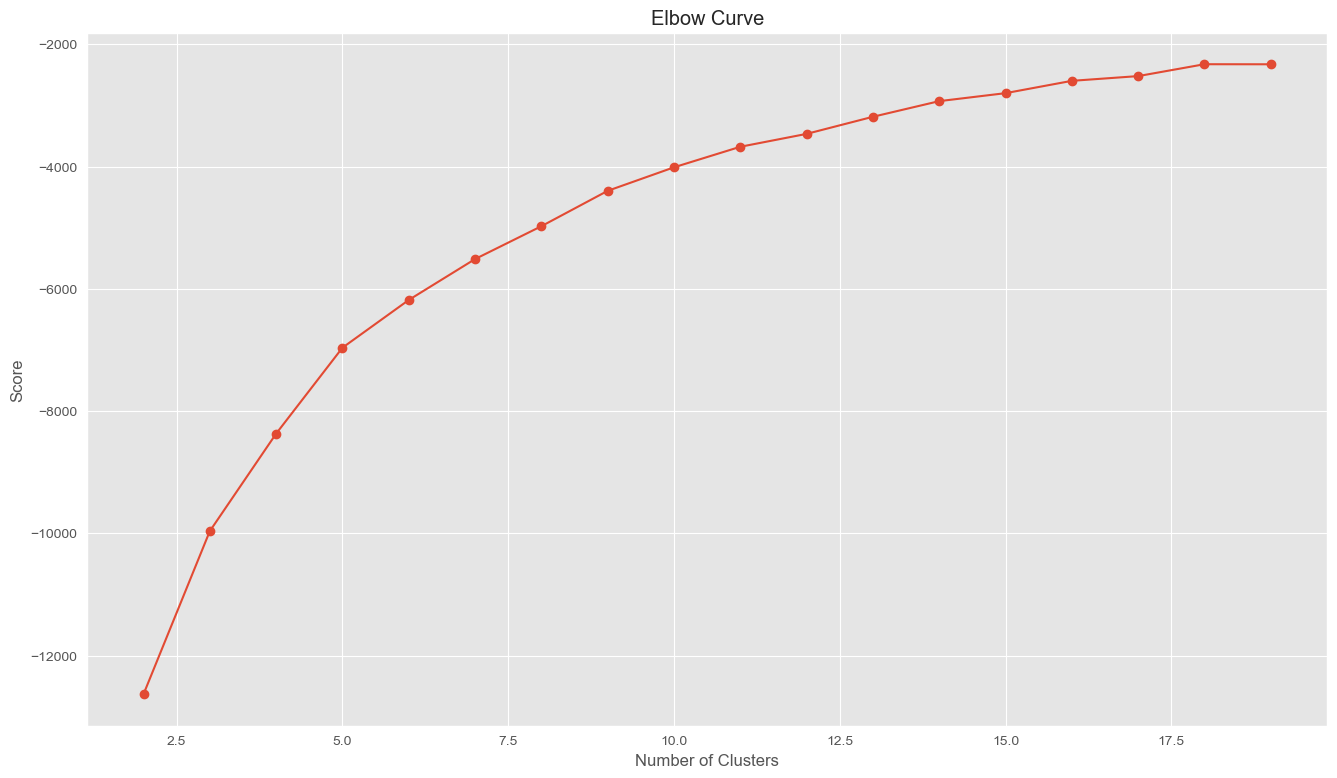

In [22]:
Nc = range(2, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
data = df_twitter[["op","ex","ag"]]
data.head()

,op,ex,ag
0,34.297953,41.948819,29.370315
1,44.986842,37.938947,24.279098
2,41.733854,38.999896,34.645521
3,40.377154,52.337538,31.082154
4,36.664677,48.530806,31.138871


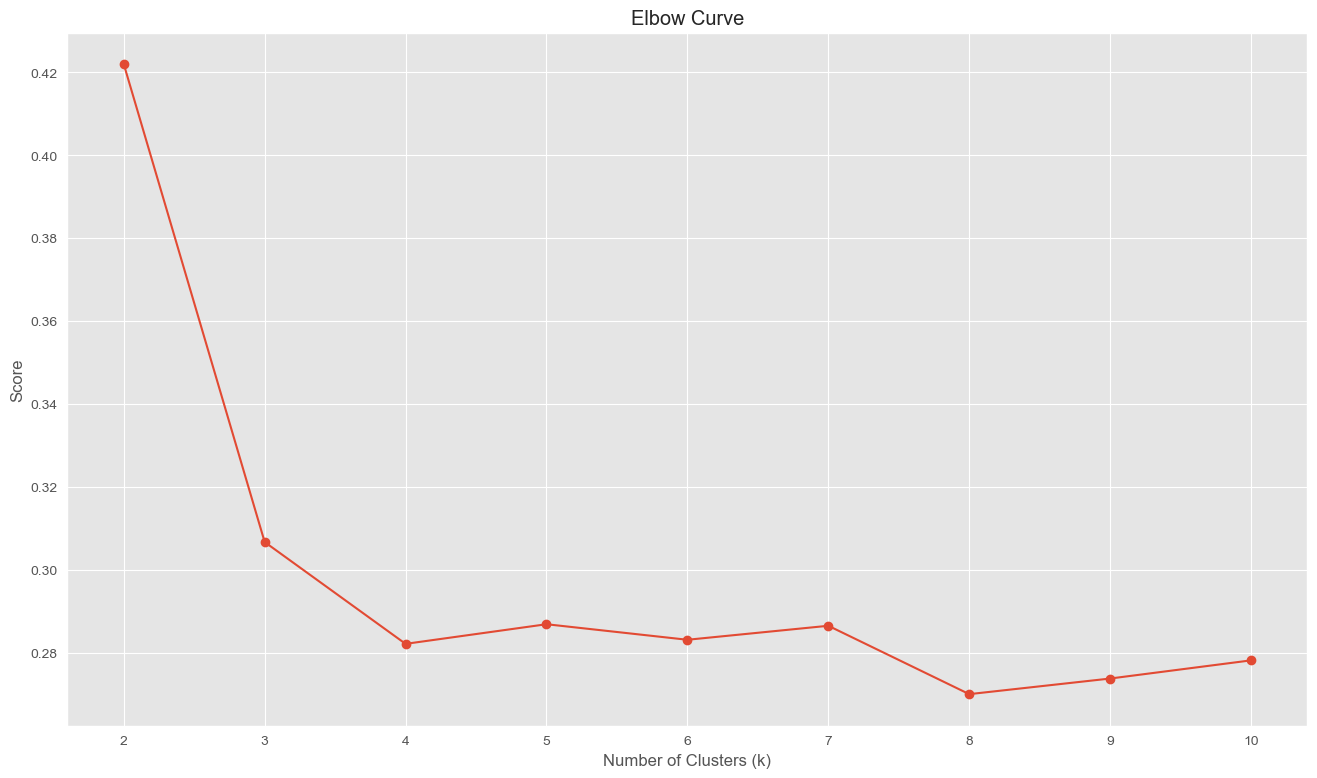

In [24]:
Nc = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    Nc.append(score)

plt.plot(range(2, 11), Nc, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

De acuerdo a las imagenes anteriores nos quedamos con 5 clusters.

In [25]:
kmeans = KMeans(n_clusters = 5)

In [26]:
kmeans.fit(data)

KMeans(n_clusters=5)

In [27]:
kmeans.cluster_centers_

array([[35.90241306, 47.56828232, 33.58748762],
       [43.15774021, 31.95380668, 20.17880047],
       [50.58986955, 40.33673957, 17.37205086],
       [40.25290633, 43.17698036, 23.18128036],
       [60.35359892, 30.299381  , 15.71781133]])

In [28]:
# Predecir clusters
labels = kmeans.predict(data)

# Centroides
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

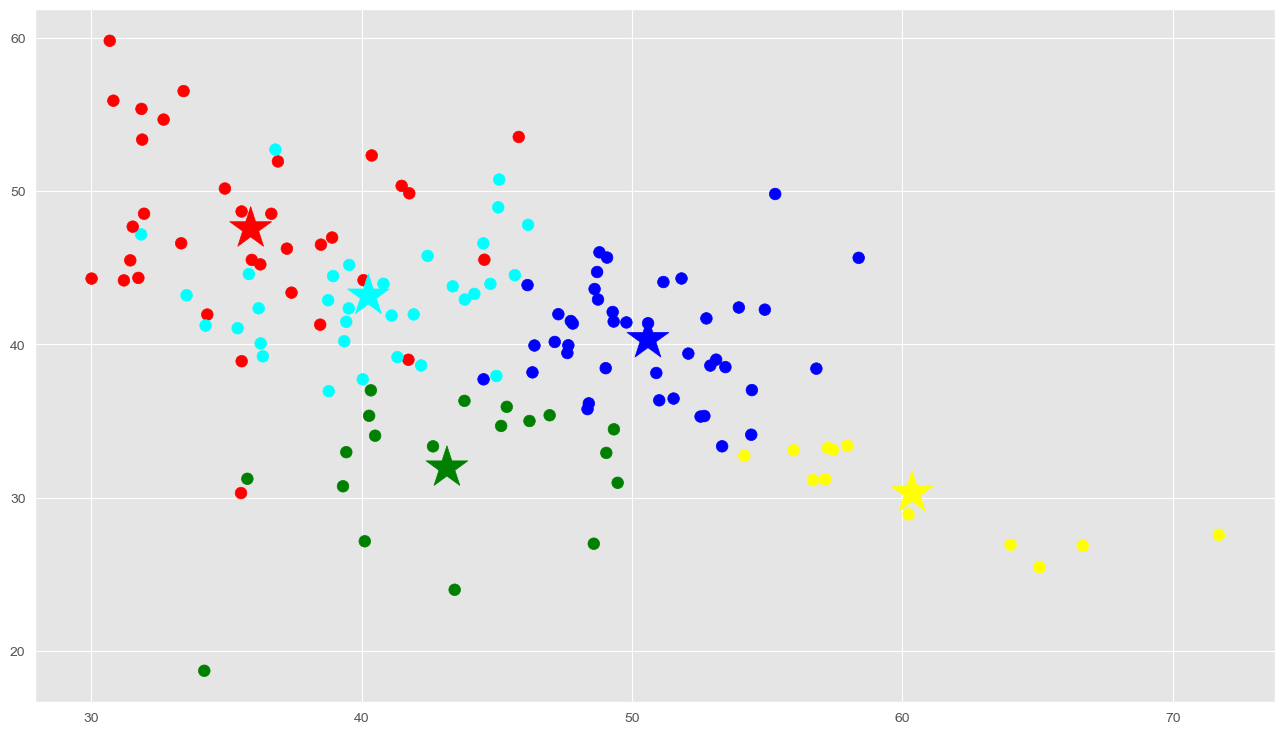

In [29]:
f1 = df_twitter['op'].values
f2 = df_twitter['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

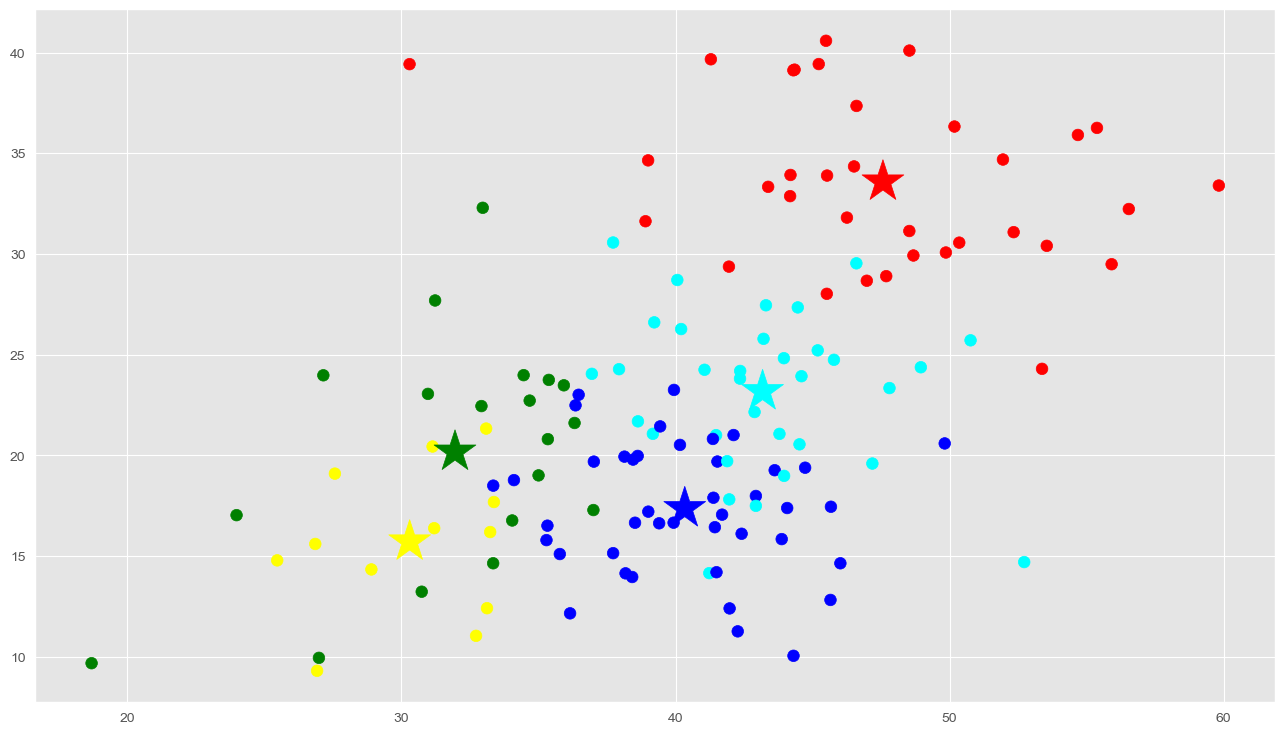

In [30]:
f1 = df_twitter['ex'].values
f2 = df_twitter['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En las gráficas se ve que los grupos parecen estar bien diferenciados.

In [31]:
# Cantidad de elementos en cada clúster

copy =  pd.DataFrame()
copy['usuario']=df_twitter['usuario'].values
copy['categoria']=df_twitter['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,34
1,green,19
2,blue,42
3,cyan,33
4,yellow,12


**Identificamos cuales son las categorías que conforman cada clúster.**

In [32]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,3.0
9,9,3.0


In [33]:
group_referrer_index = copy['label'] == 1
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,2.0
8,8,5.0
9,9,NaN


In [34]:
group_referrer_index = copy['label'] == 2
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,12.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,NaN


In [35]:
group_referrer_index = copy['label'] == 3
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,4.0
2,2,4.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,4.0
7,7,8.0
8,8,7.0
9,9,3.0


In [36]:
group_referrer_index = copy['label'] == 4
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,8.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN
